<a href="https://colab.research.google.com/github/Josephine-Analytics/Machine-Learning/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn import linear_model

In [43]:
df = pd.read_csv('/content/drive/MyDrive/HR_comma_sep 1.csv')
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [45]:
df.describe().sum()

,0
satisfaction_level,15002.851464
last_evaluation,15003.397271
number_project,15025.035646
average_montly_hours,16256.993436
time_spend_company,15025.958369
Work_accident,15000.496328
left,15000.664007
promotion_last_5years,15000.165550


In [46]:
df["left"].value_counts() #employeers who left vs those who stayed

,count
left,
0,11428
1,3571


Plot bar charts showing impact of employee salaries on retention

Plot bar charts showing corelation between department and employee retention


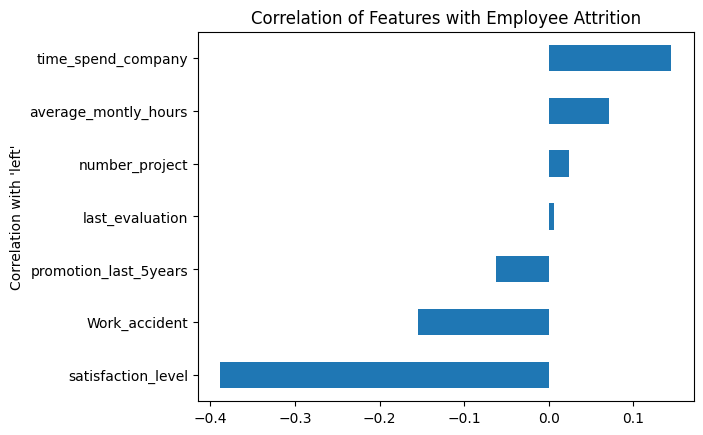

In [47]:

corr = df.corr(numeric_only=True)['left'].drop('left')# Compute correlation between numeric features and target (left)

corr = corr.sort_values()# Sort values so strongest relationships show clearly

corr.plot(kind='barh')# Plot as bar chart

plt.title("Correlation of Features with Employee Attrition")
plt.ylabel("Correlation with 'left'")
plt.show()


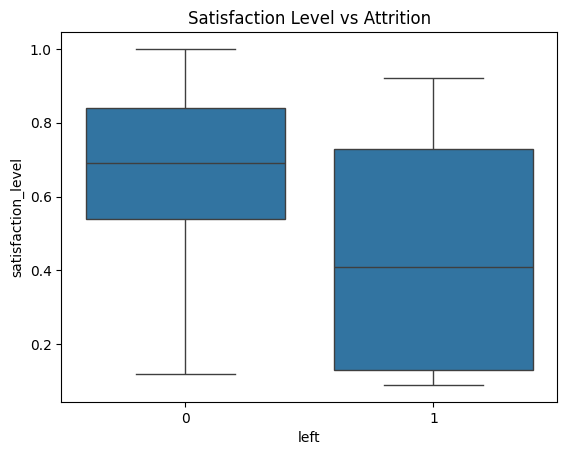

In [48]:
# Compare satisfaction distribution for those who left vs stayed

sns.boxplot(x='left', y='satisfaction_level', data=df)

plt.title("Satisfaction Level vs Attrition")
plt.show()


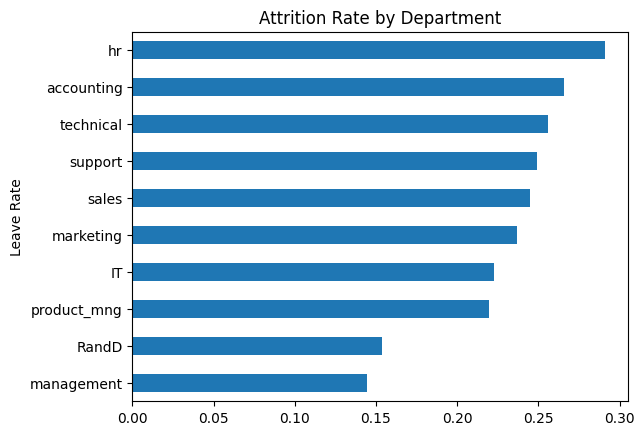

In [49]:
# Calculate leaving rate per department
dept_rate = df.groupby('Department')['left'].mean().sort_values()
dept_rate.plot(kind='barh')
plt.title("Attrition Rate by Department")
plt.ylabel("Leave Rate")
plt.show()


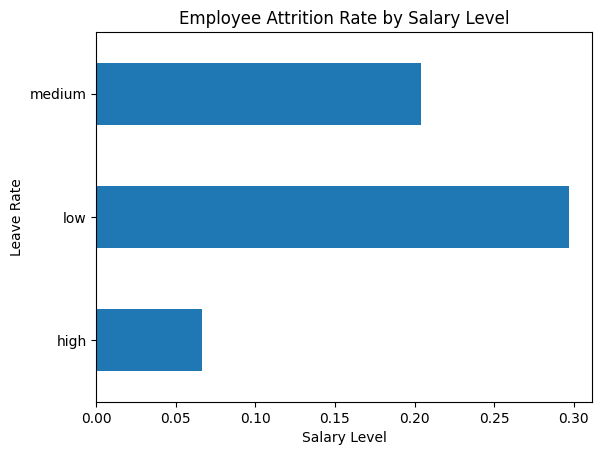

In [50]:
# Group by salary level and compute average leaving rate
salary_retention = df.groupby('salary')['left'].mean()
salary_retention.plot(kind='barh')
plt.title("Employee Attrition Rate by Salary Level")
plt.xlabel("Salary Level")
plt.ylabel("Leave Rate")
plt.show()


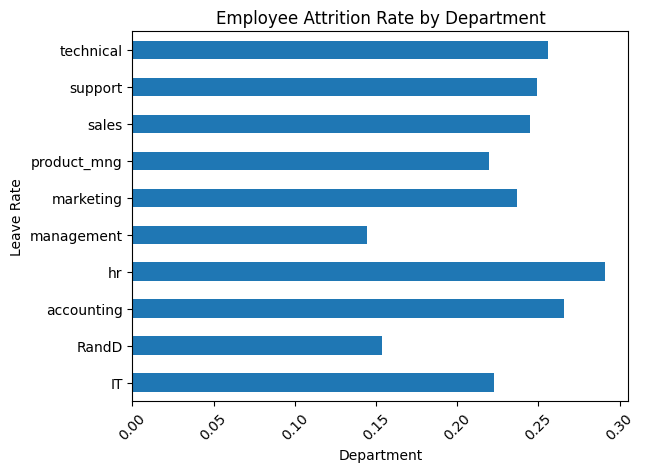

In [51]:
# Calculate retention rate (stayed = 1-left) per department
dept_retention = df.groupby('Department')['left'].mean()

# Plot attrition rate first (who left)
dept_retention.plot(kind='barh')

plt.title("Employee Attrition Rate by Department")
plt.xlabel("Department")
plt.ylabel("Leave Rate")
plt.xticks(rotation=45)
plt.show()


Now build logistic regression model using variables that were narrowed down in step 1

In [53]:
y = df['left'] #independent variable

X = df[['satisfaction_level',
        'average_montly_hours',
        'time_spend_company',
        'number_project',
        'salary',
        'Department']]



In [54]:
# Convert categorical columns to dummy variables
X = pd.get_dummies(X, drop_first=True)


In [55]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [56]:
from sklearn.linear_model import LogisticRegression

# Create model
model = LogisticRegression(max_iter=1000, class_weight='balanced')

# Train model
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [57]:
# Predict on test data
y_pred = model.predict(X_test)


Measure the accuracy of the model

In [58]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7543333333333333

Confusion Matrix:
 [[1712  582]
 [ 155  551]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.75      0.82      2294
           1       0.49      0.78      0.60       706

    accuracy                           0.75      3000
   macro avg       0.70      0.76      0.71      3000
weighted avg       0.82      0.75      0.77      3000



The logistic regression model achieved an accuracy of 76.3%. The confusion matrix shows the model predicts employee retention well but struggles to correctly identify employees who leave. The recall for the attrition class is low (0.25), indicating many leaving employees are misclassified. This is mainly due to class imbalance in the dataset, where more employees stayed than left. Applying class weighting or more advanced models could improve detection of attrition cases.